In [11]:
#libraries used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [12]:
data= pd.read_csv("zomato.csv",encoding='latin-1')

In [13]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [14]:
data.describe

<bound method NDFrame.describe of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanb

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [17]:
#columns with null value in them
[features for features in data.columns if data[features].isnull().sum()>0]


['Cuisines']

In [18]:
#filling the null with mode as it is a calagorical data
data['Cuisines'].fillna('mode',inplace=True)

In [19]:

[features for features in data.columns if data[features].isnull().sum()>0]

[]

In [20]:
data1=pd.read_excel('Country-Code.xlsx')

In [21]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [22]:
data1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [23]:
#merge the two datasets on Country Code column with left inner join
newdata=pd.merge(data,data1,on = 'Country Code', how='left')

In [24]:
newdata.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [25]:

newdata.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [26]:
#finding which country has more orders
newdata.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [27]:
#Getting all the index by country column
country_names=newdata.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [28]:
# Simply getting frequency w.r.t country column
country_val=newdata.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x7fe2a9344220>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

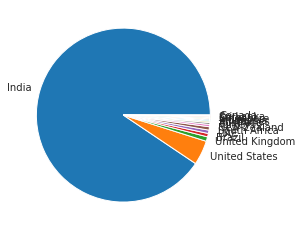

In [29]:
# pie chart for all columns
plt.pie(country_val,labels=country_names)

([<matplotlib.patches.Wedge at 0x7fe2a8e87880>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

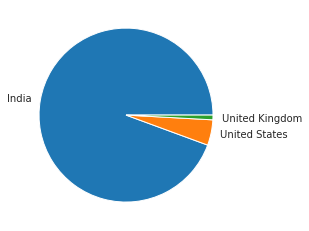

In [30]:
# pie chart of 3 countries with more frequency across dataset
plt.pie(country_val[:3],labels=country_names[:3])

In [31]:
#creating a table which will give ('Aggregate rating','Rating color','Rating text') size
newdata.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [32]:
#find the country name that has give 0 rating
newdata[newdata['Rating color']=='White'].groupby('Country').size().reset_index()


,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [33]:
newdata.groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [34]:
newdata.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [35]:
newdata[newdata['Has Online delivery']=='Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


In [36]:
newdata[['Country','Has Online delivery']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [37]:
#create pie for cities distribution
citynames=newdata.City.value_counts().index
citynames

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [38]:
;cityval=newdata.City.value_counts().values
cityval

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

([<matplotlib.patches.Wedge at 0x7fe2a8e58b50>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')])

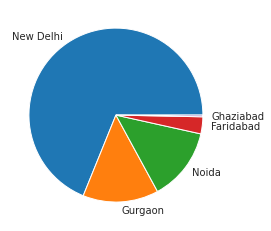

In [39]:
plt.pie(cityval[:5],labels=citynames[:5])

In [83]:
#find the top 10 cuisines
cuzin=newdata.Cuisines.value_counts().index
cuzval=newdata.Cuisines.value_counts().values

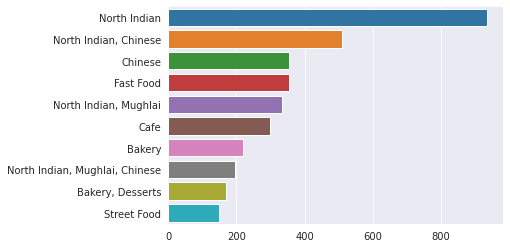

In [90]:
import seaborn as sns
sns.barplot(x=cuzval[:10],y=cuzin[:10],orient='h')